In [78]:
import json
import uproot
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema, BaseSchema
from coffea import nanoevents
from coffea import processor
import time

import numpy as np

import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.style.CMS) 

Definitions
- reconstructed mass (called output in the ntuples)
- target mass (called target_mass in the ntuples)


A script that makes plots of
- reconstructed mass for elenuqq signals (selecting events with fj_HVV_elenuqq==1 or something like that)
    - for BulkGrav and selecting events with genRes_mass = 90
    - for JHUVariableWMass and selecting events with genRes_mass = 90
    - for hww
- reconstructed mass for munuqq signals
- reconstructed mass for 4q signals (selecting events with fj_HVV_4q ==1 and nprongs == 4)
- reconstructed mass for 3q signals (selecting events with fj_HVV_4q ==1 and nprongs == 3)

launch qcd and make plot of fj_genjetmsd (assume bug)

launch signal hww and improve resolution
reco mass / softdrop mass



In [4]:
! ls rootfiles

bulkg.root     hww.root       qcd.root       variableW.root


In [51]:
# load a root file into coffea-friendly NanoAOD structure

samples = ['qcd', 'bulkg', 'hww', 'variableW']

events = {}
for sample in samples:
    events[sample] = uproot.open(f"rootfiles/{sample}.root")['Events']
    print(f"number of {sample} events is {events[sample].num_entries}")

number of qcd events is 2945967
number of bulkg events is 923547
number of hww events is 21093
number of variableW events is 514478


In [15]:
# check keys
events['qcd'].keys()

['target_mass',
 'output',
 'fj_pt',
 'fj_eta',
 'fj_phi',
 'fj_mass',
 'fj_msoftdrop',
 'fj_genjetmass',
 'fj_genRes_mass',
 'fj_genRes_pt',
 'fj_isQCDb',
 'fj_isQCDbb',
 'fj_isQCDc',
 'fj_isQCDcc',
 'fj_isQCDothers',
 'fj_H_VV_elenuqq',
 'fj_H_VV_munuqq',
 'fj_H_VV_taunuqq',
 'fj_nprongs',
 'met_relpt',
 'met_relphi']

In [16]:
reconstructed_mass = events['qcd']['output'].array().to_numpy()
target_mass = events['qcd']['target_mass'].array().to_numpy()

## Reco mass for leptonic signal

In [67]:
channels = ['ele', 'mu']
sig = ['bulkg', 'hww', 'variableW']

reco_mass = {}
target_mass = {}

for ch in channels:
    reco_mass[ch] = {}
    target_mass[ch] = {}

    for sample in sig:
        
        if ch == 'ele':
            select = events[sample]['fj_H_VV_elenuqq'].array()==1    
        else:
            select = events[sample]['fj_H_VV_munuqq'].array()==1 

        if sample in ['bulkg', 'variableW']:
            select_genRes_mass = events[sample]['fj_genRes_mass'].array()==90
            select = select & select_genRes_mass

        reco_mass[ch][sample] = events[sample]['output'].array()[select].to_numpy()
        target_mass[ch][sample] = events[sample]['target_mass'].array()[select].to_numpy()

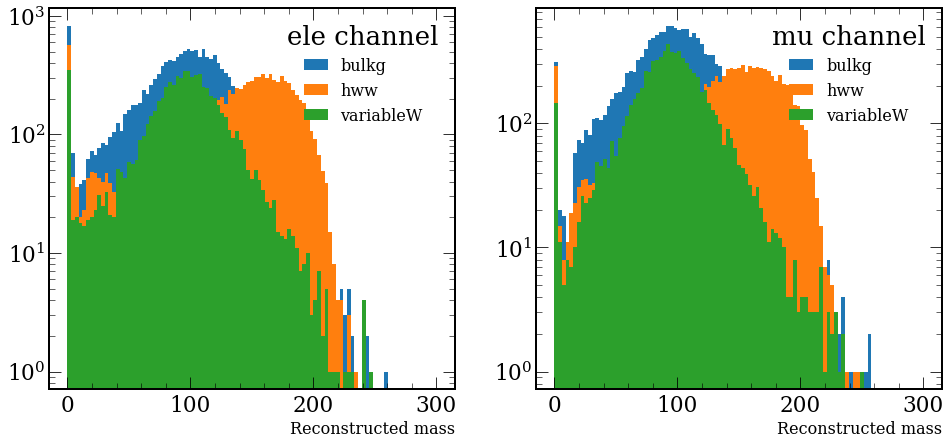

In [77]:
from matplotlib.font_manager import FontProperties

font = FontProperties()
font.set_name('Times New Roman')
plt.rcParams.update({'font.family':'serif'}) 

fig, axes = plt.subplots(ncols=2, figsize=(16,7))
for i, ch in enumerate(channels):
    for sample in sig:
        axes[i].hist(reco_mass[ch][sample], np.linspace(0, 300, 100), label=sample, fill=True, linewidth=1)
    axes[i].legend(title=f"{ch} channel", fontsize=16)

    axes[i].set_xlabel(r"Reconstructed mass", fontsize=16)
    axes[i].set_yscale('log')
    # plt.savefig(f"{PATH}/top_3.pdf")

## Reco mass for 4q signal

In [ ]:
- reconstructed mass for 4q signals (selecting events with fj_HVV_4q ==1 and nprongs == 4)
- reconstructed mass for 3q signals (selecting events with fj_HVV_4q ==1 and nprongs == 3)

In [ ]:
channels = ['ele', 'mu']
sig = ['bulkg', 'hww', 'variableW']
n_prongs = [3, 4]

reco_mass = {}
target_mass = {}

for ch in channels:
    reco_mass[ch] = {}
    target_mass[ch] = {}

    for sample in sig:
        
        if ch == 'ele':
            select = events[sample]['fj_H_VV_elenuqq'].array()==1    
        else:
            select = events[sample]['fj_H_VV_munuqq'].array()==1 

        if sample in ['bulkg', 'variableW']:
            select_prongs = events[sample]['fj_nprongs']==n_prong
            select = select & select_prongs

        reco_mass[ch][sample] = events[sample]['output'].array()[select].to_numpy()
        target_mass[ch][sample] = events[sample]['target_mass'].array()[select].to_numpy()

In [80]:
 events['hww'].keys()

['target_mass',
 'output',
 'fj_pt',
 'fj_eta',
 'fj_phi',
 'fj_mass',
 'fj_msoftdrop',
 'fj_genjetmass',
 'fj_genjetmsd',
 'fj_genRes_mass',
 'fj_genRes_pt',
 'fj_isQCDb',
 'fj_isQCDbb',
 'fj_isQCDc',
 'fj_isQCDcc',
 'fj_isQCDothers',
 'fj_H_VV_elenuqq',
 'fj_H_VV_munuqq',
 'fj_H_VV_taunuqq',
 'fj_nprongs',
 'met_relpt',
 'met_relphi']

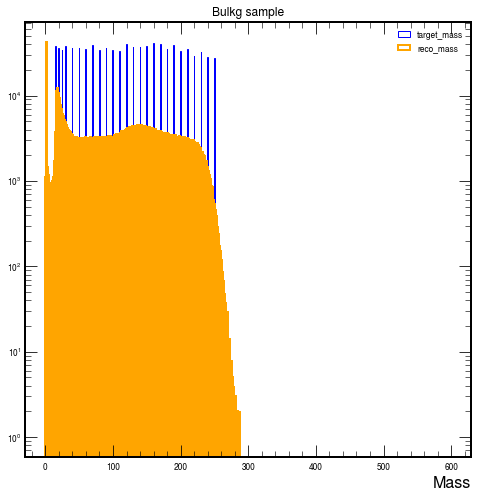

In [96]:
fig, ax = plt.subplots(figsize=(8,8))
ax.hist(bulkg_events['target_mass'].array().to_numpy(), np.linspace(0, 600, 600), label='target_mass', fill=False, edgecolor='Blue', linewidth=1)
ax.hist(bulkg_events['output'].array().to_numpy(), np.linspace(0, 600, 600), label='reco_mass', fill=False, edgecolor='Orange', linewidth=2)

ax.legend()

ax.set_xlabel(r"Mass", fontsize=16)
ax.set_title('Bulkg sample')
ax.set_yscale('log')
# plt.savefig(f"{PATH}/top_3.pdf")

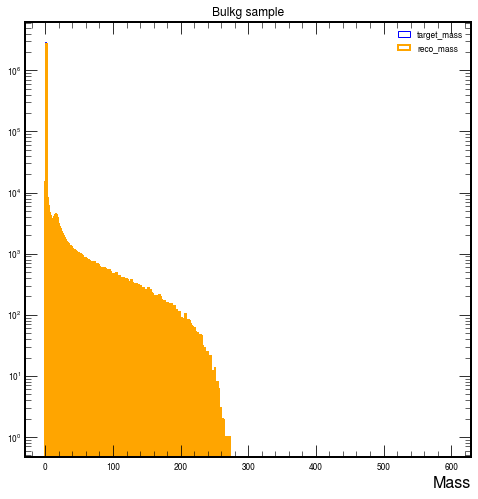

In [110]:
fig, ax = plt.subplots(figsize=(8,8))
ax.hist(qcd_events['target_mass'].array().to_numpy(), np.linspace(0, 600, 600), label='target_mass', fill=False, edgecolor='Blue', linewidth=1)
ax.hist(qcd_events['output'].array().to_numpy(), np.linspace(0, 600, 600), label='reco_mass', fill=False, edgecolor='Orange', linewidth=2)

ax.legend()

ax.set_xlabel(r"Mass", fontsize=16)
ax.set_title('Bulkg sample')
ax.set_yscale('log')
# plt.savefig(f"{PATH}/top_3.pdf")